# Titanic Project (Practice Project - 5)

In [1]:
# Import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import dataset

titanic_data = pd.read_csv("titanic project.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape of the dataset

titanic_data.shape

(891, 12)

There are 891 Rows & 12 Columns, According to me columns=["PassangerId","Name","Ticket"] are not useful for the models. So, let's first drop it.

In [4]:
# Droping Unusable Columns

titanic_data.drop(columns = ["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

print("Shape of the data --> ",titanic_data.shape)
titanic_data.head()

Shape of the data -->  (891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Now our data is ready for EDA

In [5]:
# Quick information about dataset

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


It seems that there are missing values in our dataset. Let's check how many missing values are available

In [6]:
# Missing Values

titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Columns = ["Age",  "Cabin",  "Embarked"] have null values. Let's check how many percentages (%) they are covering from the datset.

In [7]:
column_data = titanic_data.isna().sum().keys().tolist()
value_data = titanic_data.isna().sum().values.tolist()

missing_data = pd.DataFrame(list(zip(column_data, value_data)),columns=["Columns", "Missing Values"],index=list(range(1,10)))
missing_data["Missing %"] = round(((missing_data["Missing Values"]/titanic_data.shape[0])*100),2)

print("\nMissing Values for Titanic Data :-")
missing_data


Missing Values for Titanic Data :-


,Columns,Missing Values,Missing %
1,Survived,0,0.00
2,Pclass,0,0.00
3,Sex,0,0.00
4,Age,177,19.87
5,SibSp,0,0.00
6,Parch,0,0.00
7,Fare,0,0.00
8,Cabin,687,77.10
9,Embarked,2,0.22


"Cabin" is covering 77.10 % of null values which is very high. and other are covering less null values.

In [8]:
# Let's describe the dataset

titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survive is our target column.

It seems that some have age and some doesn't have age.

It seems that Age and Fare column have skewness. Survived is our target column and Pclass,SibSp & Parch looks as classification. So we need to focus on Age & Fare columns for filling null values.

In [9]:
# Let's check the "0" values if there are present

for col in titanic_data:
           print(col +"  "+str(titanic_data[titanic_data[col]==0].shape[0]))
        

Survived  549
Pclass  0
Sex  0
Age  0
SibSp  608
Parch  678
Fare  15
Cabin  0
Embarked  0


I discussed about all column in which 0 is present but Fare column is not a classification column and it has 0 values. Let's analyze it.

In [10]:
# Let's check Fare column where 0 values are present

titanic_data[titanic_data["Fare"]==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
179,0,3,male,36.0,0,0,0.0,NaN,S
263,0,1,male,40.0,0,0,0.0,B94,S
271,1,3,male,25.0,0,0,0.0,NaN,S
277,0,2,male,NaN,0,0,0.0,NaN,S
302,0,3,male,19.0,0,0,0.0,NaN,S
413,0,2,male,NaN,0,0,0.0,NaN,S
466,0,2,male,NaN,0,0,0.0,NaN,S
481,0,2,male,NaN,0,0,0.0,NaN,S
597,0,3,male,49.0,0,0,0.0,NaN,S
633,0,1,male,NaN,0,0,0.0,NaN,S


In [11]:
# Let's describe the categorical data

titanic_data.describe(include='object')

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,B96 B98,S
freq,577,4,644


The frequency of Male is higher than Female, Males have covered 65% data.
In Embarked S covered the 644 out of 889.

<Figure size 504x504 with 0 Axes>

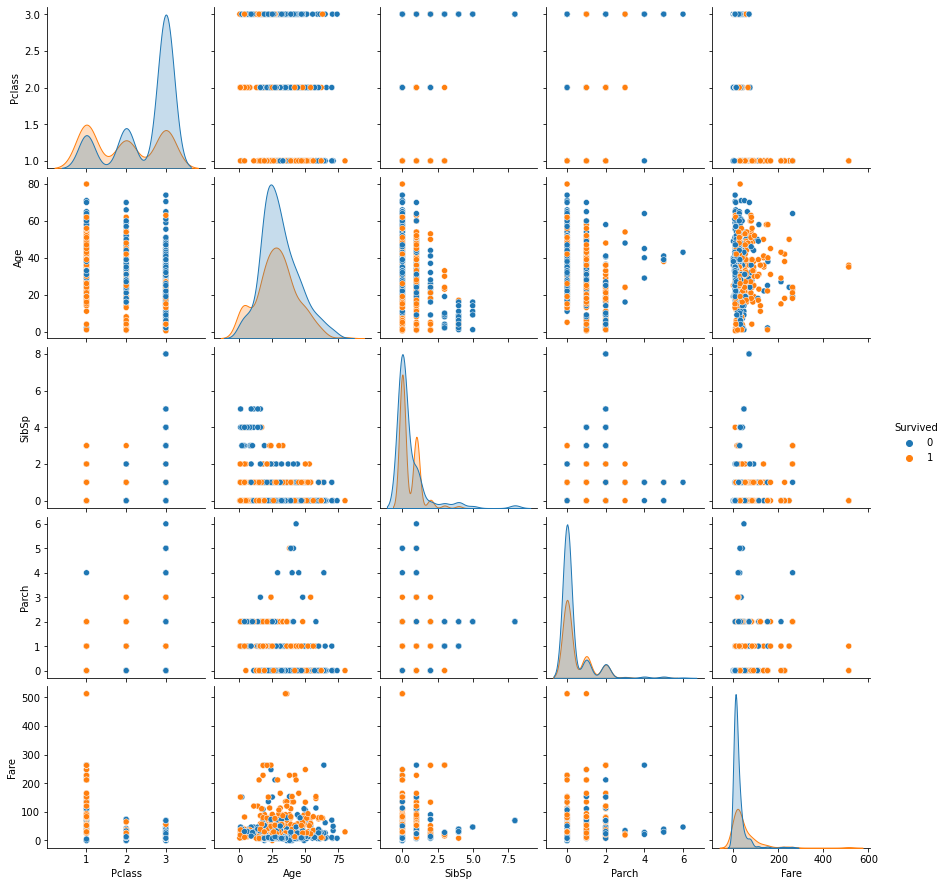

In [12]:
# Let's check pairplot with Survived

plt.figure(figsize=(7,7))
sns.pairplot(titanic_data,hue="Survived")

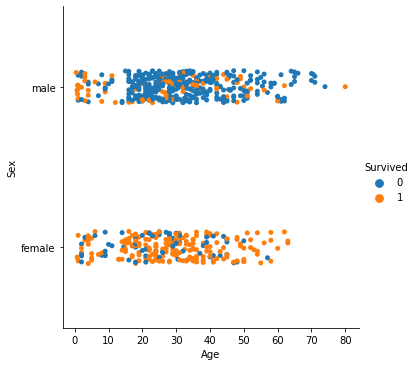

In [13]:
# Analyzing 

sns.catplot(x="Age",y="Sex",data=titanic_data,hue="Survived")

It seems that Females are more survive than Males

In [14]:
# Let's Handle the Missing Data


# Dropna Embarked
titanic_data.dropna(subset=["Embarked"],inplace=True)

# Filling Age with its mean value
titanic_data.fillna(titanic_data["Age"].mean(), inplace=True)

# Filling Cabin with 0
titanic_data.fillna(titanic_data["Cabin"].mode(),inplace=True)

In [15]:
# Check Null Values again

titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
# Let's check the skewness

titanic_data.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.434355
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

As we discussed that SibSp & Parch are classifiation columns, So I have to go with Fare column for making skewness correct

In [17]:
# Let's separate the numerica columns and categorical columns

numerical = titanic_data.drop(columns=["Sex", "Cabin", "Embarked"])
categorical = titanic_data[["Sex", "Cabin", "Embarked"]]

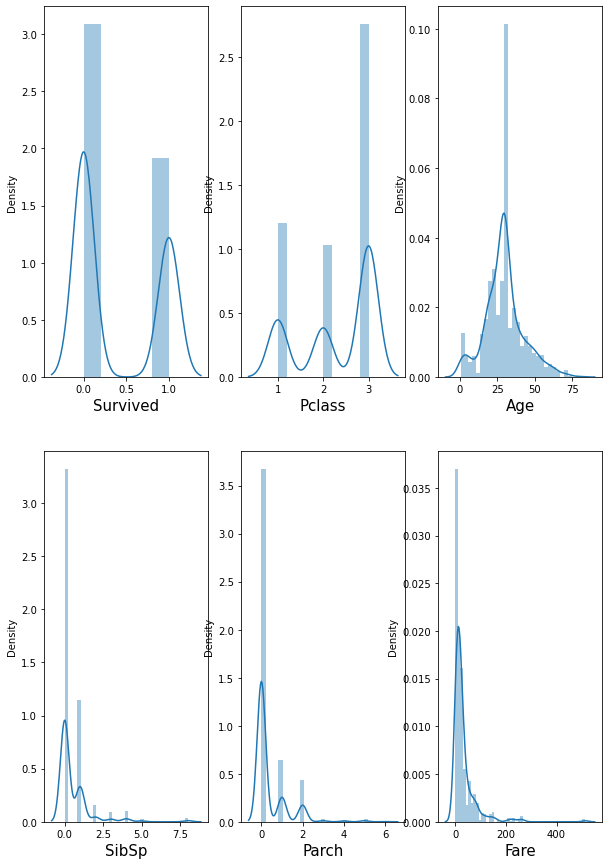

In [18]:
# Let's visualizing the skewness with Distplot

plt.figure(figsize = (10,15), facecolor='white')
graphplot = 1
for column in numerical:
    if graphplot <=6:
        ax = plt.subplot(2,3,graphplot)
        sns.distplot(numerical[column])
        plt.xlabel(column, fontsize=15)
    graphplot+=1
plt.show()

Fare column has skewness and other column have classification problems

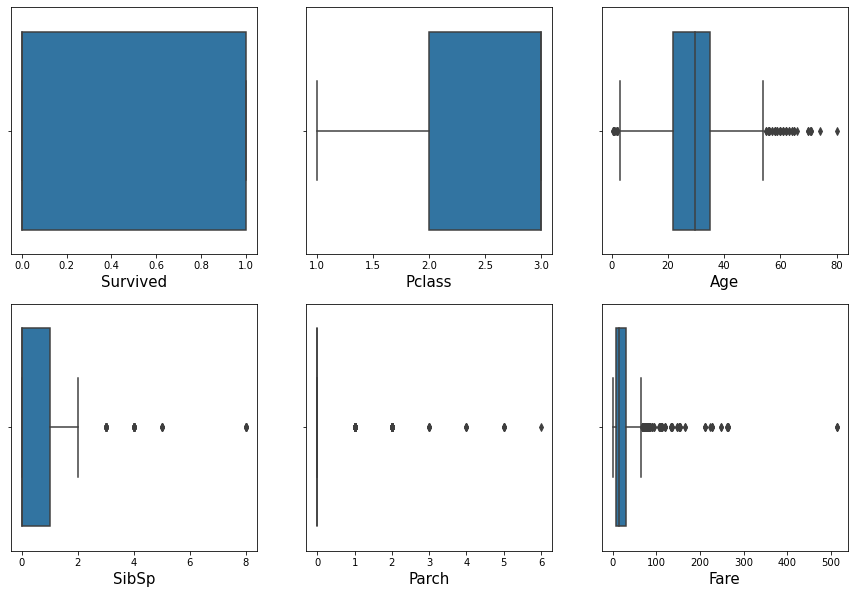

In [19]:
# Let's check the outliers

plt.figure(figsize = (15,10), facecolor='white')
graphplot = 1
for column in numerical:
    if graphplot<=6:
        ax = plt.subplot(2,3,graphplot)
        sns.boxplot(numerical[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

Outliers are present in Fare column.

In [20]:
# Let's remove the outliers

from scipy.stats import zscore

z = np.abs(zscore(numerical))
titanic_data = titanic_data[(z<3).all(axis=1)]
titanic_data.shape

(818, 9)

In [21]:
# Let's check skewness again

titanic_data.skew()

Survived    0.457268
Pclass     -0.639191
Age         0.314053
SibSp       1.975774
Parch       2.118544
Fare        2.342849
dtype: float64

Skewness is still pending in Fare column. Let's apply another method

In [22]:
# Let's remove the pending skewness

for index in titanic_data.skew().index:
    if titanic_data.skew().loc[index]>0.5:
        titanic_data[index] = np.sqrt(titanic_data[index])
    if titanic_data.skew().loc[index]<-0.5:
        titanic_data[index] = np.cbrt(titanic_data[index])

In [23]:
# Let's check skewness again..

titanic_data.skew()

Survived    0.457268
Pclass     -0.799021
Age         0.314053
SibSp       1.133008
Parch       1.719456
Fare        1.363890
dtype: float64

Skewness is still pending in Fare column. Let's apply Power Transformer to remove it...

In [24]:
# Let's apply Power Transformer to remove the skewness

from sklearn.preprocessing import PowerTransformer

features = ["Pclass","Age", "SibSp", "Parch","Fare"]

scaler = PowerTransformer(method='yeo-johnson')
titanic_data[features] = scaler.fit_transform(titanic_data[features].values)

In [25]:
titanic_data.skew()

Survived    0.457268
Pclass     -0.456334
Age         0.071856
SibSp       0.943010
Parch       1.577507
Fare        0.043989
dtype: float64

It seems that skewness has gone from Fare column. Now Let's deal with categorical column.

In [26]:
# Let's separate the input and output

x = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [27]:
# Let's check the correlation between features and target

x.corrwith(y)

Pclass   -0.319794
Age      -0.104474
SibSp     0.162401
Parch     0.212967
Fare      0.357993
dtype: float64

<AxesSubplot:title={'center':'Correlation Between Features & Targer'}>

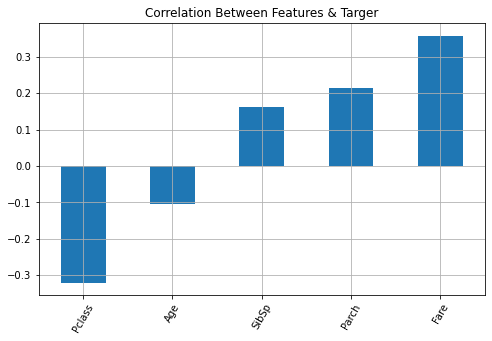

In [28]:
# Correlation analysis by ploting a graph between features and target

x.corrwith(y).plot(kind='bar',grid=True, figsize=(8,5),rot=60,title="Correlation Between Features & Targer")

2 features is correlated in negative and 3 features in correlated in positive but not any features is highly correlated to the target. Now, let's check the multicollinearity between features

In [29]:
# Multicollinearity between features

corr = titanic_data.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.319794,-0.104474,0.162401,0.212967,0.357993
Pclass,-0.319794,1.000000,-0.305205,-0.140809,-0.088213,-0.649681
Age,-0.104474,-0.305205,1.000000,-0.102791,-0.262648,0.122118
SibSp,0.162401,-0.140809,-0.102791,1.000000,0.346366,0.396769
Parch,0.212967,-0.088213,-0.262648,0.346366,1.000000,0.301684
Fare,0.357993,-0.649681,0.122118,0.396769,0.301684,1.000000


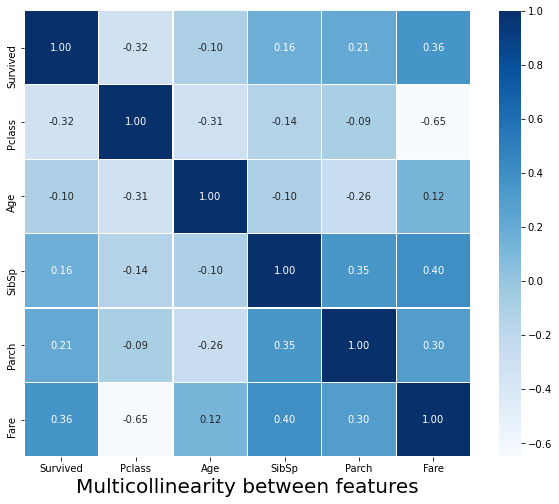

In [30]:
# Let's plot a heatmap for better analysis the multicollinearity

plt.figure(figsize = (10,10))
sns.heatmap(corr,cbar=True,square=True,annot=True,cbar_kws={"shrink":.82},
            annot_kws={"size":10},cmap="Blues",fmt=".2f",linewidths=.2)
plt.xlabel("Multicollinearity between features",fontsize=20)
plt.show()

Now it is clear that no any single feature is correlated to another feature. Let's check VIF Score for more analysis.

In [31]:
# Converting categorical column to numerical column using OneHotEncoder

cat_to_conv = ["Sex", "Cabin", "Embarked"]

titanic_data = pd.get_dummies(titanic_data, columns=cat_to_conv)

titanic_data.shape

(818, 146)

In [32]:
# Dataset after converting categorical columns to numerical columns

titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_29.64209269662921,Cabin_A10,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,0.866798,-0.615905,1.560225,-0.485434,-0.774522,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,-1.490470,0.692688,1.560225,-0.485434,1.570024,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0.866798,-0.280320,-0.634788,-0.485434,-0.698522,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,-1.490470,0.453473,1.560225,-0.485434,1.223439,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.866798,0.453473,-0.634788,-0.485434,-0.685029,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# Let's separate the input and output again..

X = titanic_data.drop(columns = ["Survived"],axis=1)
Y = titanic_data["Survived"]

In [34]:
# Let's do Scaling first before proceeding to the VIF Score

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)

x_scaled

array([[ 0.8667975 , -0.61590471,  1.56022516, ..., -0.47966153,
        -0.3082967 ,  0.61408825],
       [-1.49047043,  0.69268819,  1.56022516, ...,  2.0848034 ,
        -0.3082967 , -1.62843045],
       [ 0.8667975 , -0.28032048, -0.63478839, ..., -0.47966153,
        -0.3082967 ,  0.61408825],
       ...,
       [ 0.8667975 ,  0.01983199,  1.56022516, ..., -0.47966153,
        -0.3082967 ,  0.61408825],
       [-1.49047043, -0.28032048, -0.63478839, ...,  2.0848034 ,
        -0.3082967 , -1.62843045],
       [ 0.8667975 ,  0.21174835, -0.63478839, ..., -0.47966153,
         3.24362864, -1.62843045]])

In [35]:
# Let's check the VIF Score first..

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = X.columns
                    
vif.head(5)

,VIF Score,Features
0,2.992252,Pclass
1,1.714227,Age
2,1.835861,SibSp
3,1.981444,Parch
4,3.455896,Fare


All the VIF Scores are less than 5. Now it is cross verified that multicollinearity is not exists between the features. Let's do the analysis of target column now.

In [36]:
# Target Column (Survived) Analysis

titanic_data["Survived"].value_counts()

0    500
1    318
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

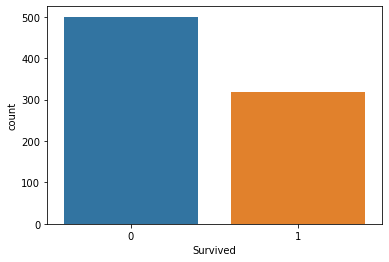

In [37]:
# Let's plot countplot for better analysis

sns.countplot(titanic_data["Survived"])

It seems that class is not balance. Let's check the percentage of each using pie chart

<AxesSubplot:ylabel='Survived'>

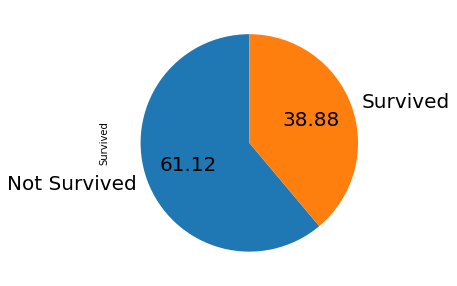

In [38]:
# let's plot a pie chart to check the contribution of each

titanic_data["Survived"].value_counts().plot.pie(figsize=(5,5), autopct="%1.2f",startangle=90,
                                                 labels=["Not Survived","Survived"],fontsize=20)

There is big difference between classes. Let's do the Oversampling to balance the classes

In [39]:
# Oversampling for class Imbalance


from imblearn.over_sampling import SMOTE

SM = SMOTE()

X,Y = SM.fit_resample(X,Y)

Y.value_counts()

1    500
0    500
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

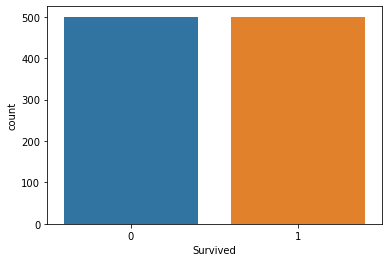

In [40]:
# Let's check countplot again...

sns.countplot(Y)

Now It is clear that class are balanced.

In [41]:
# Let's do scaling again for the latest unsampled data

from sklearn.preprocessing import StandardScaler

sca = StandardScaler()
x_scal = sca.fit_transform(X)

x_scal

array([[ 0.94892368, -0.56856025,  1.48941218, ..., -0.48117262,
        -0.29488391,  0.64376017],
       [-1.3811642 ,  0.68952093,  1.48941218, ...,  2.07825622,
        -0.29488391, -1.55337352],
       [ 0.94892368, -0.24592957, -0.66548899, ..., -0.48117262,
        -0.29488391,  0.64376017],
       ...,
       [-0.51638874,  1.61432716, -0.66548899, ..., -0.48117262,
        -0.29488391,  0.64376017],
       [-0.47730945,  0.04155749, -0.66548899, ..., -0.48117262,
        -0.29488391, -1.55337352],
       [ 0.94892368,  0.09099117, -0.66548899, ..., -0.48117262,
        -0.29488391,  0.64376017]])

In [42]:
# Shape of final data

titanic_data.shape

(818, 146)

Number of component explaining 95% variance :  131


[]

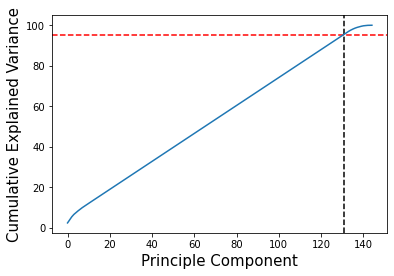

In [43]:
# There are so many columns. So, Let's use the PCA

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

x_pca = PCA()
x_pca.fit(x_scal)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>95)
print("Number of component explaining 95% variance : ",k)

plt.xlabel("Principle Component", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=15)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
plt.plot(var_cumu)
plt.plot()

In [44]:
# Finalysing the features with PCA for model buildings

Pca = PCA(n_components = 131)
df_x = Pca.fit_transform(x_scal)

df_x

array([[-1.61325646e+00, -1.01021074e-01,  5.83971112e-01, ...,
         2.08110584e-15,  4.68101270e-16, -3.73206252e-15],
       [ 4.92986057e+00, -1.26484129e-01, -2.57101425e+00, ...,
         1.48691637e+00, -5.19376636e-01,  1.69968470e+00],
       [-8.84159976e-01, -1.46197701e+00,  1.57627536e-01, ...,
         1.89100751e-17, -4.58918888e-16, -2.43601238e-16],
       ...,
       [ 9.40022916e-01,  1.31618217e-01,  4.54975497e-01, ...,
        -8.00781624e-17, -3.00617012e-16,  5.08780992e-16],
       [ 2.68805487e-01, -1.05935193e+00, -9.51675936e-01, ...,
         3.45246162e-16,  3.03436379e-16,  3.13420324e-16],
       [-1.98813459e+00,  5.07333486e-01,  2.23438530e-01, ...,
         2.07501300e-16,  4.18569651e-16, -4.08940046e-17]])

In [45]:
# Let's import the necessary libraries for models

from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score


In [46]:
# Let's find the best random state

def model(mod):
    max_auc = 0
    max_state = 0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(df_x,Y,test_size = 0.25, random_state =i)
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        auc_scor = accuracy_score(y_test, y_pred)
        if auc_scor>max_auc:
            max_auc=auc_scor
            max_state=i
    print("Best Accuracy Score corresponding to ",max_state,"is ",auc_scor)
    print("Cross Validation Score : ",cross_val_score(mod,df_x,Y,cv=5).mean())
    print("Classifiation Report-->\n\n",classification_report(y_test,y_pred))

In [47]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
model(LR)

Best Accuracy Score corresponding to  41 is  0.764
Cross Validation Score :  0.7779999999999999
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.75      0.74      0.75       117
           1       0.78      0.78      0.78       133

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



In [48]:
# Models Format

def models(mods):
    x_train,x_test,y_train,y_test = train_test_split(df_x,Y,test_size = 0.25, random_state =41)
    mods.fit(x_train,y_train)
    y_preds = mods.predict(x_test)
    auc_score = accuracy_score(y_test, y_preds)
    print("Best Accuracy Score corresponding to ",auc_score)
    print("Cross Validation Score : ",cross_val_score(mods,df_x,Y,cv=5).mean())
    print("Classifiation Report-->\n\n",classification_report(y_test,y_preds))          

In [49]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTR = DecisionTreeClassifier()

models(DTR)

Best Accuracy Score corresponding to  0.856
Cross Validation Score :  0.765
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.87      0.88      0.87       143

    accuracy                           0.86       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.86      0.86      0.86       250



In [50]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

models(KNC)

Best Accuracy Score corresponding to  0.864
Cross Validation Score :  0.8140000000000001
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.80      0.91      0.85       107
           1       0.92      0.83      0.88       143

    accuracy                           0.86       250
   macro avg       0.86      0.87      0.86       250
weighted avg       0.87      0.86      0.86       250



In [51]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

models(GBC)

Best Accuracy Score corresponding to  0.872
Cross Validation Score :  0.805
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.93      0.84      0.88       143

    accuracy                           0.87       250
   macro avg       0.87      0.88      0.87       250
weighted avg       0.88      0.87      0.87       250



In [52]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier

BC = BaggingClassifier()

models(BC)

Best Accuracy Score corresponding to  0.84
Cross Validation Score :  0.7859999999999999
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.89      0.82      0.85       143

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



In [53]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

models(RFC)

Best Accuracy Score corresponding to  0.848
Cross Validation Score :  0.8109999999999999
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.81      0.85      0.83       107
           1       0.88      0.85      0.86       143

    accuracy                           0.85       250
   macro avg       0.84      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



## Let's check ROC AUC Curve for the fitted model

In [56]:
x_train,x_test,y_train,y_test = train_test_split(df_x,Y,test_size = 0.25, random_state =41)

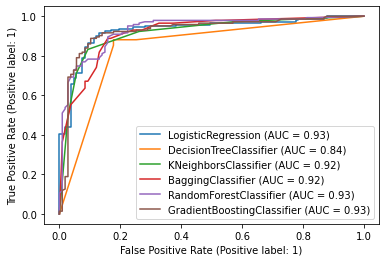

In [57]:
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":10},loc="lower right")
plt.show()

### After analyzing ROC AUC Curve the Accuray Scores & Cross Validatio Scores of above 6 models, I choose Logistic Regression becasue this is the only model which is not getting the difference in accuracy score after cross validation and It is looking stable with it's score. Now let's try to increase the score by applying hyperparameter tuning 

In [58]:
# Hyperparameter Tuning with Logistic Regression

from sklearn.model_selection import GridSearchCV

param_grid = {"penalty" : ['l1','l2'], "intercept_scaling" : [1,2,3],
             "random_state" : [81,131,151], "max_iter" : [100,200]}

grid_srch = GridSearchCV(LR, param_grid=param_grid)
grid_srch.fit(df_x,Y)
grid_srch.best_params_

{'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l2', 'random_state': 81}

## Final Model

In [59]:
Final_Model = LogisticRegression(intercept_scaling=1, max_iter=100, penalty='l2', random_state=81)

x_train,x_test,y_train,y_test = train_test_split(df_x,Y,test_size = 0.25, random_state =41)
Final_Model.fit(x_train,y_train)
y_preds = Final_Model.predict(x_test)
auc_scr = accuracy_score(y_test, y_preds)
print("Best Accuracy Score corresponding to ",auc_scr)
print("Classifiation Report-->\n\n",classification_report(y_test,y_preds))

Best Accuracy Score corresponding to  0.852
Classifiation Report-->

               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.88      0.86      0.87       143

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



## Saving The Model

In [60]:
import joblib

joblib.dump(Final_Model,"Final_Titanic_Project_Model.plk")

['Final_Titanic_Project_Model.plk']